## Analyzing Iris Dataset using Multiclass Classification - Logisitc Regression and K-nearest neighbors

In [3]:
# Import Data Analytic modules

import numpy as np

import pandas as pd

from pandas import Series, DataFrame

import math

from sklearn import linear_model

In [2]:
# Import Data Visualization modules

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

sns.set_style('whitegrid')

In [5]:
# Importing Iris dataset from sklearn

from sklearn.datasets import load_iris

In [6]:
iris = load_iris()

In [12]:
X = iris.data

Y = iris.target

## Understanding dataset

In [14]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## Creating dataframes using Pandas for Analysis

In [15]:
# Establishing Features and Target:

#Features

iris_data = DataFrame(X, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])

In [16]:
iris_data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
# Target

iris_target = DataFrame(Y, columns = ['Species'])

In [24]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [25]:
def flower(x):
    if x == 0:
        return 'Setosa'
    elif x == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [26]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [27]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [29]:
#Combining Features and Targets and building the dataframe

iris = pd.concat([iris_data, iris_target], axis = 1)

iris

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Analyzing data

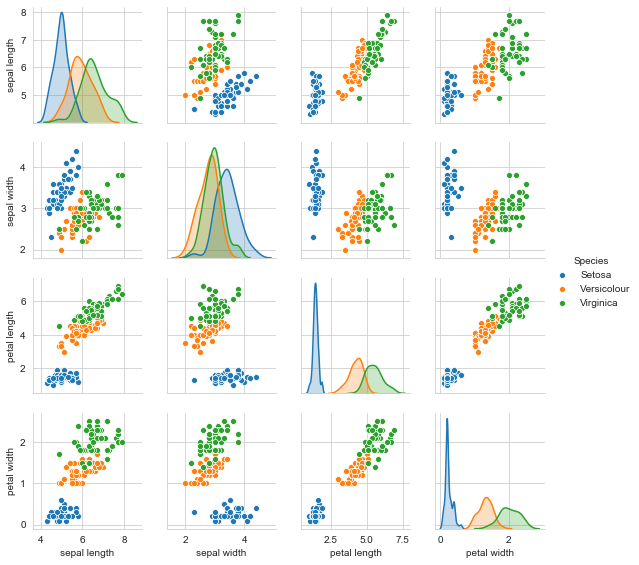

In [31]:
sns.pairplot(data = iris, hue = 'Species', height = 2)

Setosa is clearly distince from the the other two species

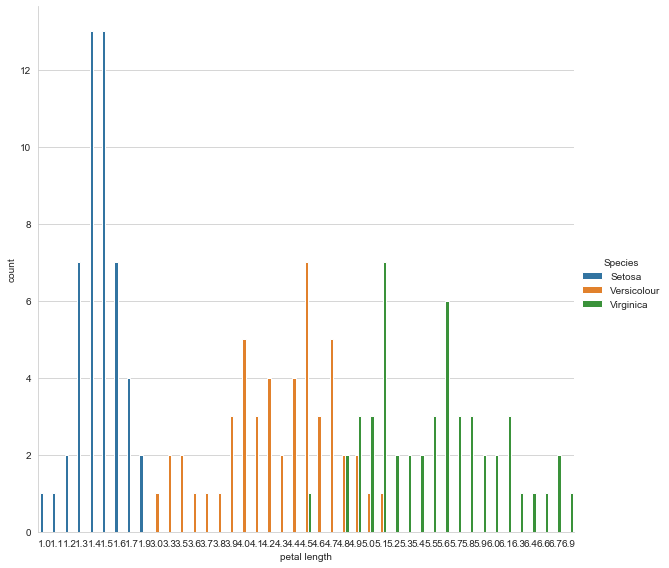

In [37]:
# Comparing petal lengths of all the species

sns.catplot(x = 'petal length', kind = 'count', hue = 'Species', data = iris, size = 8)

In [39]:
# Importing Linear Regression models

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [42]:
logreg = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 3)

In [43]:
logreg.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# Testing model accuracy

from sklearn import metrics

In [45]:
# Prediction class from the features

Y_pred = logreg.predict(X_test)

In [46]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.9333333333333333


from the pairplot we can see that most of the features are dictinct to the particular species. We can expect a strong model

## Applying K-nearest neighbour method for classification

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# Calculating accuracy for n = 6

knn = KNeighborsClassifier(n_neighbors = 6)

In [67]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [68]:
Y_pred = knn.predict(X_test)

In [69]:
print (metrics.accuracy_score(Y_test, Y_pred))

0.9666666666666667


In [70]:
# Calculating accuracy for n = 9

knn = KNeighborsClassifier(n_neighbors = 9)

In [71]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [72]:
Y_pred = knn.predict(X_test)

In [73]:
print(metrics.accuracy_score(Y_test, Y_pred))

0.95


In [85]:
k_range = range(1, 21) 

accuracy = []

for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    knn.fit(X_train, Y_train)
    
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

Text(0, 0.5, 'accuracy')

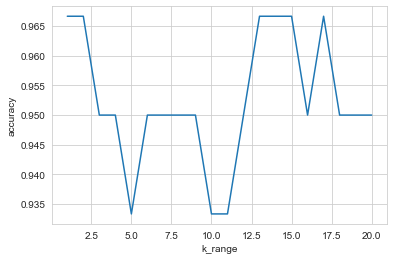

In [88]:
plt.plot(k_range,accuracy)

plt.xlabel('k_range')

plt.ylabel('accuracy')